# K Means Clustering com Python
+ Util apra dados nao rotulados

+ Seção 10 do livro
+ Aprendizadno nao supervisionado: Ele tenta agrupar os dados em grupos, por si so (CLUSTER)
+ Objetivo:
    + Dividir em 'k' grupos diferentes
+ Usado para:
    + Agrupamento Automatico de Documentos
    + Agrupamento de CLientes
    + Segmentação de Mercado Financeiro
    + Geoestatistica
+ Algoritmo (ELe é interativo, roda varias vezes n veses (aleartorio)
    1. Escolher um número K de clusters
        + A escolha do k pode ser um problema pois nem sempre se sabe
    2. Defini uma classe para todos os pontos
    ....
    
K Means Clustering é um algoritmo de aprendizagem sem supervisão que tenta agrupar dados com base em sua similaridade. A aprendizagem não supervisionada significa que não há resultados a serem previstos, e o algoritmo apenas tenta encontrar padrões nos dados. No K means clustering temos a especificar o número de clusters nos quais os dados devem ser agrupados. O algoritmo atribui aleatoriamente cada observação a um cluster e encontra o centróide de cada cluster. Então, o algoritmo itera através de duas etapas:
Reatribui pontos ao cluster cujo centroide é o mais próximo e calcula o novo centróide de cada cluster. Estes dois passos são repetidos até que a variação dentro do cluster não possa ser mais reduzida. A variação dentro do cluster é calculada como a soma da distância euclidiana entre os pontos de dados e seus respectivos centroides do cluster.

## Importa bibliotecas

In [4]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Cria dados

In [5]:
# Vamos criar clusters fake (aleartorios)
# o modulo (sklearn.datasets) ja possui 
# Varios datasets para treinar e testar coisas de ML
from sklearn.datasets import make_blobs
# make_blobs => gera dados atificiais para clustreres

In [6]:
# @ n_samples = quantidade de rows
# @ n_features = quanitdade de columns
# @ centers = Qunatidade de centroide (centros de  m pontos)
#        ou seja, quantidade de clusters,. na pratica, nao temos 
#        acesso as classes, mas como estamos trteinando uma
#        aleartoria, é bom sabermos se acertamos ou nao
# @cluster_std = Desvio pardaroa dos dados (se variam muito ou nao entre si)
# @random_state = serve para gerar os mesmso dados que o do prof
data = make_blobs(n_samples=200, n_features=2, 
    centers=4, cluster_std=1.8,random_state=50)

In [8]:
type(data)

tuple

In [10]:
# array de array, contendo os dados
data[0]

array([[-8.93722174e-01,  9.15701092e+00],
       [ 1.23585696e+00, -7.13688556e+00],
       [-2.36890848e+00,  5.90117122e+00],
       [-1.56744385e+00,  8.83066676e+00],
       [-5.91162281e+00, -3.99788697e+00],
       [-2.57213409e+00, -4.56276818e+00],
       [-1.58565923e+00,  1.14534495e+01],
       [-8.17087621e-01, -5.17172944e+00],
       [-2.02558502e-01, -6.58004386e+00],
       [-6.56528804e+00, -2.18963876e+00],
       [-5.14930135e+00, -3.01962800e+00],
       [-4.44413629e+00,  8.93666381e+00],
       [-2.40161178e+00, -2.36014899e+00],
       [-2.79736853e+00,  2.36246827e+00],
       [-5.84548867e+00, -5.57179725e-01],
       [-2.01405317e+00,  4.14220478e+00],
       [-2.95041121e+00,  1.11585792e+01],
       [-9.45265788e-01,  1.03557821e+01],
       [-5.23853914e+00, -1.53946762e+00],
       [-4.74274653e+00, -1.95761215e+00],
       [-7.00341952e+00, -3.75603497e+00],
       [-2.75979554e+00,  3.07510679e+00],
       [-4.88766545e+00,  1.07255479e+01],
       [-1.

In [11]:
# Contem as classes que esses dados petencem
data[1]

array([2, 0, 3, 3, 1, 0, 2, 0, 0, 1, 1, 2, 1, 1, 1, 3, 2, 2, 1, 1, 1, 3,
       2, 2, 2, 3, 2, 1, 3, 2, 2, 1, 1, 0, 0, 1, 1, 1, 3, 3, 2, 1, 3, 3,
       0, 0, 2, 3, 3, 2, 0, 1, 3, 2, 3, 3, 0, 1, 1, 3, 0, 0, 2, 0, 0, 2,
       0, 3, 2, 2, 0, 1, 2, 0, 3, 3, 1, 3, 3, 0, 1, 3, 1, 1, 1, 1, 2, 0,
       2, 1, 0, 2, 0, 3, 3, 1, 0, 3, 0, 3, 1, 0, 3, 2, 3, 0, 3, 1, 1, 2,
       0, 1, 2, 2, 1, 3, 2, 2, 3, 0, 2, 2, 2, 2, 0, 2, 2, 3, 2, 0, 1, 0,
       0, 3, 2, 3, 0, 2, 2, 1, 2, 3, 2, 1, 1, 2, 0, 3, 0, 1, 2, 1, 3, 0,
       0, 3, 2, 0, 0, 0, 3, 3, 1, 0, 1, 1, 1, 3, 0, 0, 0, 0, 1, 3, 0, 2,
       1, 0, 2, 3, 0, 3, 3, 2, 1, 0, 1, 2, 3, 0, 3, 3, 1, 3, 0, 2, 1, 3,
       1, 2])

## Visualizando os dados data

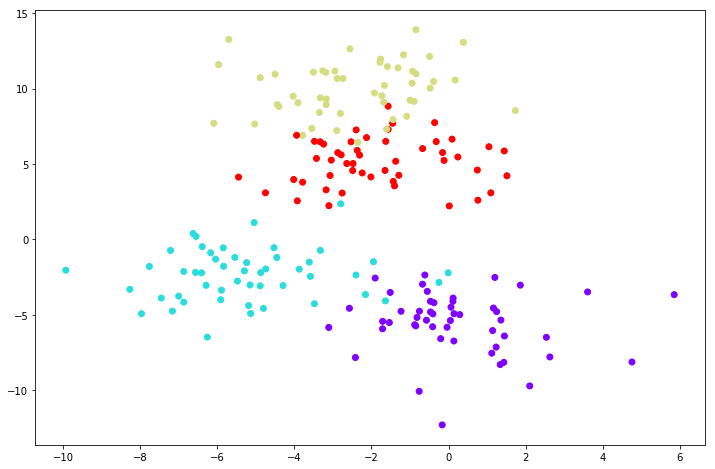

In [13]:
# Vsiaulizas os dados
# @1 => eixo x    @3 => o que determina a cor
# @2 => eixo y    @4 => cor
plt.figure(figsize = (12,8))
plt.scatter(data[0][:,0], data[0][:,1], c=data[1], cmap='rainbow')

## Criando os clusters

In [14]:
from sklearn.cluster import KMeans

In [15]:
kmeans = KMeans(n_clusters=4)

In [16]:
# treinar (voce nao presisa dividir entre teste e prediçao)
kmeans.fit(data[0])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [18]:
# Onde é localizado os centroides (centros)
kmeans.cluster_centers_

array([[-2.37178661, 10.27788487],
       [ 0.11584155, -5.37562512],
       [-5.64892498, -2.38445033],
       [-1.94847438,  5.20472404]])

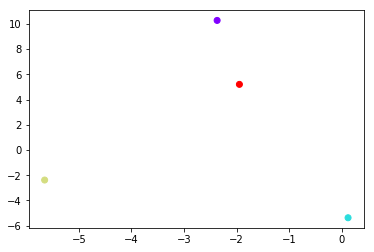

In [37]:
# printando centroides, esse tolist() e´por que tem que ser lista e o que retornou é array
centroides = kmeans.cluster_centers_
plt.scatter(centroides[:,0].tolist(), centroides[:,1].tolist(), c=[0,1,2,3], cmap='rainbow')

In [38]:
kmeans.labels_

array([0, 1, 3, 0, 2, 1, 0, 1, 1, 2, 2, 0, 2, 3, 2, 3, 0, 0, 2, 2, 2, 3,
       0, 0, 0, 3, 0, 1, 3, 0, 0, 2, 2, 1, 1, 2, 2, 2, 3, 3, 0, 2, 3, 3,
       1, 1, 0, 3, 3, 0, 1, 2, 3, 0, 3, 3, 1, 2, 2, 3, 1, 1, 0, 1, 1, 0,
       1, 3, 0, 0, 1, 2, 3, 1, 3, 3, 2, 3, 3, 1, 2, 3, 2, 2, 2, 2, 0, 1,
       0, 2, 1, 0, 1, 3, 3, 2, 1, 3, 1, 3, 2, 1, 3, 0, 3, 1, 3, 1, 2, 0,
       1, 2, 0, 0, 2, 3, 0, 0, 3, 1, 0, 3, 0, 0, 1, 0, 0, 3, 3, 1, 2, 1,
       1, 3, 0, 3, 1, 0, 0, 2, 0, 3, 3, 1, 2, 0, 1, 3, 1, 2, 0, 2, 3, 1,
       1, 3, 0, 1, 1, 1, 3, 3, 1, 1, 2, 2, 2, 3, 1, 1, 1, 1, 2, 3, 1, 3,
       2, 1, 0, 3, 1, 3, 3, 0, 2, 1, 2, 0, 3, 1, 3, 3, 2, 3, 1, 0, 2, 3,
       2, 0])

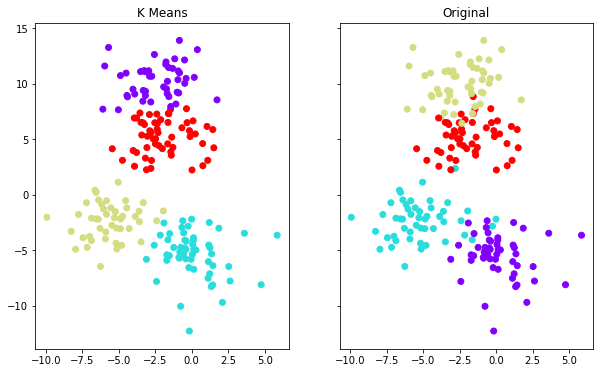

In [39]:
# SUBPLOT (varios graficos em uma imagem)
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))
# 1° Gráfico - O Nosso K means
ax1.set_title('K Means')
ax1.scatter(data[0][:,0],data[0][:,1],c=kmeans.labels_,cmap='rainbow')
# 2° Gráfico - O Original
ax2.set_title("Original")
ax2.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow')
# O algoritmo conseguiu performar bem

Você deve notar que as cores não têm relação entre as duas parcelas.

** Voce pode terstar com maior nuemro de cluster, com 2 da certo**